In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('labeled_data.csv')

In [ ]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
print(df['tweet'].iloc[19])

" black bottle &amp; a bad bitch "


In [ ]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
nltk.download('stopwords')

df['class'].value_counts()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


class
1    19190
2     4163
0     1430
Name: count, dtype: int64

In [ ]:
# Inisialisasi stemmer
stemmer = PorterStemmer()

def remove_special_text(tweet):
    # Menghapus teks yang diawali dengan tanda seru atau kata "RT"
    cleaned_tweet = re.sub(r'^[!RT]+', '', tweet)
    # Menghapus tag pengguna Twitter (username) yang diawali dengan karakter '@'
    cleaned_tweet = re.sub(r'@\w+', '', cleaned_tweet)
    # Menghapus karakter HTML entities seperti &amp;, &lt;, &gt;, &quot;
    cleaned_tweet = re.sub(r'&\w+;', '', cleaned_tweet)
    # Menghapus tanda baca dan karakter khusus lainnya
    cleaned_tweet = re.sub(r'[^\w\s]', '', cleaned_tweet)
    # Menghapus karakter whitespace tambahan
    cleaned_tweet = re.sub(r'\s+', ' ', cleaned_tweet)
    return cleaned_tweet.strip()  # Menghapus spasi di awal dan akhir teks


# Fungsi untuk melakukan stemming pada setiap token
def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Fungsi untuk melakukan pra-pemrosesan teks
def preprocess_text(text):
    # Menghapus teks khusus
    text = remove_special_text(text)
    # Menghapus teks yang diawali dengan kata "RT"
    text = re.sub(r'\bRT\b', '', text)
    # Mengubah teks menjadi huruf kecil
    text = text.lower()
    # Menghapus karakter yang tidak diinginkan menggunakan regular expression
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenisasi teks
    tokens = nltk.word_tokenize(text)
    # Menghapus stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    tokens = stem_tokens(tokens)
    # Menggabungkan token kembali menjadi teks
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text.strip()

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['tweet_proc'] = df['tweet'].apply(preprocess_text)

In [ ]:
print('before processing: ')
print(df['tweet'].iloc[4])
print('after processing: ')
print(df['tweet_proc'].iloc[4])

before processing: 
!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
after processing: 
shit hear might true might faker bitch told ya


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(df['tweet_proc'])
cv = CountVectorizer()
x = cv.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['tweet_proc'], df['class'], test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(19826,)

In [ ]:
X_test.shape

(4957,)

In [ ]:
y_train.shape

(19826,)

In [ ]:
y_test.shape

(4957,)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
import tensorflow as tf

# Hyperparameters


embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm1_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm2_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 64)           640000    
                                                                 
 bidirectional (Bidirection  (None, 120, 128)          66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 751619 (2.87 MB)
Trainable params: 751619 

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(y_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/10
620/620 - 171s - loss: 0.3796 - accuracy: 0.8749 - val_loss: 0.3157 - val_accuracy: 0.8965 - 171s/epoch - 275ms/step
Epoch 2/10
620/620 - 157s - loss: 0.2546 - accuracy: 0.9164 - val_loss: 0.3047 - val_accuracy: 0.8919 - 157s/epoch - 253ms/step
Epoch 3/10
620/620 - 159s - loss: 0.1906 - accuracy: 0.9356 - val_loss: 0.3292 - val_accuracy: 0.8854 - 159s/epoch - 257ms/step
Epoch 4/10
620/620 - 158s - loss: 0.1391 - accuracy: 0.9537 - val_loss: 0.3840 - val_accuracy: 0.8808 - 158s/epoch - 255ms/step
Epoch 5/10
620/620 - 160s - loss: 0.1062 - accuracy: 0.9644 - val_loss: 0.4616 - val_accuracy: 0.8796 - 160s/epoch - 258ms/step
Epoch 6/10
620/620 - 158s - loss: 0.0858 - accuracy: 0.9714 - val_loss: 0.4637 - val_accuracy: 0.8763 - 158s/epoch - 255ms/step
Epoch 7/10
620/620 - 159s - loss: 0.0693 - accuracy: 0.9763 - val_loss: 0.5753 - val_accuracy: 0.8719 - 159s/epoch - 257ms/step
Epoch 8/10
620/620 - 154s - loss: 0.0627 - accuracy: 0.9781 - val_loss: 0.5803 - val_accuracy: 0.8733 - 

In [ ]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

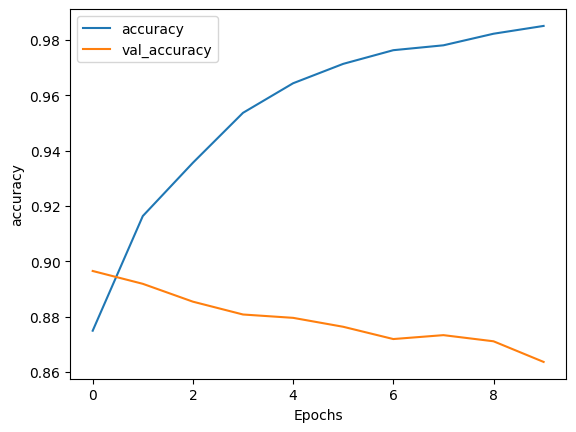

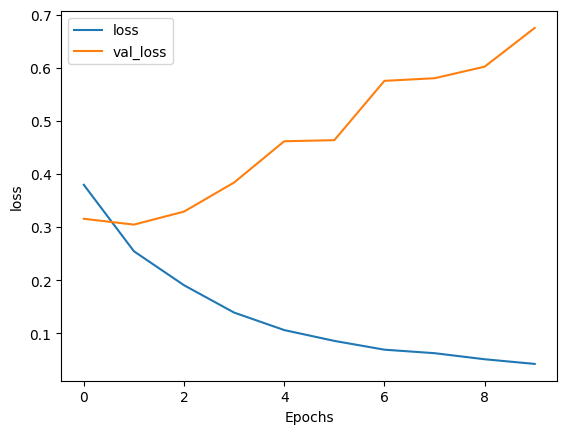

In [ ]:
# Plot the accuracy and loss history
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
loss, accuracy = model.evaluate(testing_padded, testing_labels)
print("Loss:", loss*100)
print("Accuracy:", accuracy*100)

155/155 [==============================] - 11s 69ms/step - loss: 0.6750 - accuracy: 0.8636
Loss: 0.6749663949012756
Accuracy: 0.8636271953582764


In [ ]:
# Kalimat masukan
input_sentence = "You're so stupid, I can't believe anyone would listen to you"

# Pra-pemrosesan kalimat masukan
preprocessed_input = preprocess_text(input_sentence)

# Konversi ke dalam format yang sesuai
input_sequence = tokenizer.texts_to_sequences([preprocessed_input])
padded_input = pad_sequences(input_sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)
padded_input = np.array(padded_input)


# Memprediksi kelas
predictions = model.predict(padded_input)

# Mengambil kelas dengan nilai probabilitas tertinggi
predicted_class = np.argmax(predictions)

# Print hasil prediksi


# if statement untuk menampilkan label kelas
if predicted_class == 0:
    print("Predicted Class: Hate Speech")
elif predicted_class == 1:
    print("Predicted Class: Offensive Language")
elif predicted_class == 2:
    print("Predicted Class: Neither")
else:
    print("Predicted Class: Unknown")

1/1 [==============================] - 3s 3s/step
Predicted Class: Offensive Language


In [ ]:
# Kalimat masukan
input_sentence = "I hate people like you"

# Pra-pemrosesan kalimat masukan
preprocessed_input = preprocess_text(input_sentence)

# Konversi ke dalam format yang sesuai
input_sequence = tokenizer.texts_to_sequences([preprocessed_input])
padded_input = pad_sequences(input_sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Memprediksi kelas
padded_input = np.array(padded_input)


# Memprediksi kelas
predictions = model.predict(padded_input)

# Mengambil kelas dengan nilai probabilitas tertinggi
predicted_class = np.argmax(predictions)

# Print hasil prediksi
# class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - neither

# if statement untuk menampilkan label kelas
if predicted_class == 0:
    print("Predicted Class: Hate Speech")
elif predicted_class == 1:
    print("Predicted Class: Offensive Language")
elif predicted_class == 2:
    print("Predicted Class: Neither")
else:
    print("Predicted Class: Unknown")

1/1 [==============================] - 0s 45ms/step
Predicted Class: Hate Speech
